In [1]:
import numpy as np
from scipy.stats import t, norm,chi2

In [2]:
#1
X     = np.array([-1,3,4])
X_pdf = np.array([1./3,.5,1/6.])
print("a")
exp_val = sum(X*X_pdf)
print(exp_val)
print("b")
var = sum(X**2*X_pdf) - exp_val**2
print(var)
print("c")
print("mode = most probable value =", 3)
print("d")
print(np.sqrt(var)/exp_val) #could also be expressed as percaentge

a
1.8333333333333335
b
4.138888888888888
c
mode = most probable value = 3
d
1.1096868741576094


In [3]:
#2
print("it is 1 - the probsbility of observing only smaller than 100-yearfloods:",1-0.99**10)

print("b")


it is 1 - the probsbility of observing only smaller than 100-yearfloods: 0.09561792499119559
b


the asumtion of homoscedasticity is violated, that is the assumtion that the variance of the errors are equal for all observations and do not depend on the varibles. if that where the case, figure b would be linear.

to make it better i would first of all do s log-log plot to see if there is some structure down in the blob of datapoints in figure a, that could make the choise of model clearer.

it i skinda har to tell weather the middle part of b is somewhat liear because of the scale- difference, but assumin that it is, iy is evident that there are some extremes in the resuduls that are throwing it of a bit.
excluding the outlayers to get a better fit could be a solution, and / or weighting the datapoints, as it is the tails of the residuals that are heavy.

a, i
(143.39969610788157, 146.60030389211843)
a, ii
(143.33007698998662, 146.66992301001338)
b
The difference is causd by that the stdent t distribution gives a higher spread in the aproximation for mu for low n-s. the difference is very small here because n is rather large and the t distributin converges to the norml distribution for high ns, illustrated in the plot below.


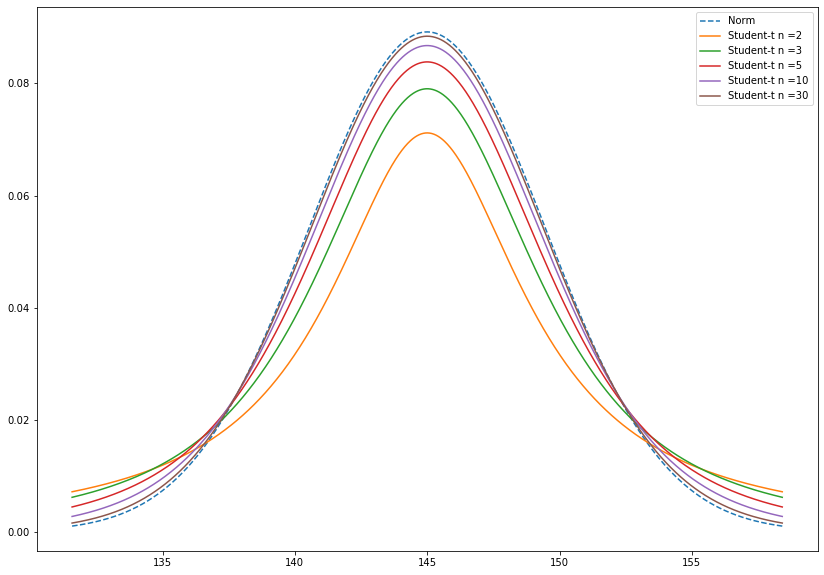

c
variance 95: [36.14366602 12.68528005]


In [4]:
#3
n = 30
df=n-1
mu = 145
var = 20
std= np.sqrt(var)

print("a, i")
print(norm.interval(0.95,mu,np.sqrt(var/n)))

print("a, ii")
print(t.interval(0.95,df,mu,np.sqrt(var/n)))


print("b")
print("The difference is causd by that the stdent t distribution gives a higher spread in the aproximation for mu for low n-s. the difference is very small here because n is rather large and the t distributin converges to the norml distribution for high ns, illustrated in the plot below.")
import matplotlib.pyplot as plt
x = np.linspace(mu-std*3,mu+std*3,1000)
plt.subplots(figsize=(14,10))
plt.plot(x,norm.pdf(x,mu,std),"--",label="Norm")
ns = [2,3,5,10,30]
for i in ns:
    plt.plot(x,t.pdf(x,i-1,mu,std),label="Student-t n ={}".format(i))
    
plt.legend()
plt.show()

print("c")

print("variance 95:",(df)*var/np.array(chi2.interval(.95,df)))


4
a) you split it into training data and test data to make shure potentially good results are not just the reult of overfitting. it could be th case that your algorithm is just fine tuning itself on the data you are traing on, and would therefore potentially not preform well on new data. for this reason you save some of your avilible data for the test set. the model has not seen this data during training and, can therefore not be fine tuned to this data. the algorithm is run with the goal of minimizing the error on the training data, the training error. when this is on a satisfyingly low level you run the lgorithm on the not yet seen trst data to compare the error on this set, the test error with the training error. if the training error i way higher than the test error, you can be fairly shure that your model is overfittet on the training data, and has lost generality.

b)
this is because some of the same reasons as discussed in a. an arbitrarily complex model can be fitted perfectly to anything, probably at the cost of predicative power. 
the relationship between the lenght of a piece of 2by4 plank and its weight, represented by a 1000 measurements on a somewhat straight line can be perfectly aproximatd by a 999-degree polinomial, but the predicative power of this is probably garbage. if you constrain your model to a first degree polinomial, your results would probably be concideribly better.
an overly complex model would be at risk of overfitting, it would take longer to train, and would be more computationally expensive. 